# Basic test
Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [5]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from ContinuousModel.Bee import Bee
from ContinuousModel.Hive import Hive
from ContinuousModel.Model import Model
from ContinuousModel.Resource import Resource

In [7]:
import mesa
import matplotlib.pyplot as plt

## Instantiate model

In [76]:
model = Model(SIZE=10)

# Create a beehive
HIVE = model.create_agent(Hive, location=(0,0))

model.create_agent(Bee, hive=HIVE,location=HIVE.location)
model.create_agent(Bee, hive=HIVE,location=(4,-1))
model.create_agent(Bee, hive=HIVE,location=(-2,6))
model.create_agent(Resource, location=(3,3))

c:\Users\Pablo\Desktop\ABM\Repo\abm-project\ContinuousModel\Model.py:30: UserWarning: You are trying to set model.agents. In a next release, this attribute is used by MESA itself so you cannot use it directly anymore.Please adjust your code to use a different attribute name for custom agent storage
  self.agents = []


In [60]:
model.step()

## Plot scenario

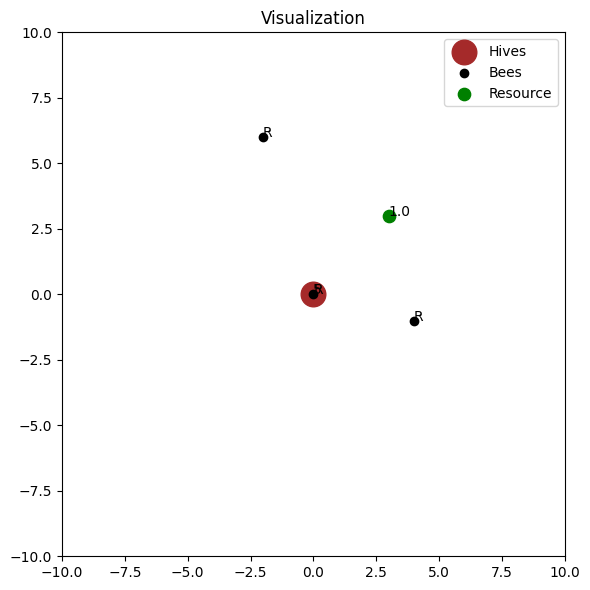

In [88]:
# Create canvas
fig, ax = plt.subplots(dpi=100,figsize=(6,6))

# Set limits of space based on model parameter
ax.set_xlim([-model.size,model.size])
ax.set_ylim([-model.size,model.size])

# Get agents of each type
agents = model.agents
bees = [agent for agent in agents if isinstance(agent, Bee)]
hives = [agent for agent in agents if isinstance(agent, Hive)]
resources = [agent for agent in agents if isinstance(agent, Resource)]

for hive in hives:
    ax.text(hive.location[0],hive.location[1], hive.young_bees)
    ax.scatter(hive.location[0],hive.location[1],c='brown',s=3.14*hive.radius**2,label='Hives')

for bee in bees:
    # Add text indicating their state (0,1,2,3,4)
    ax.text(bee.location[0],bee.location[1], str(bee.state)[6:7])
    ax.scatter(bee.location[0],bee.location[1],c='black',label='Bees')

for resource in resources:
    # TODO: Plot resource scent
    # TODO: Use different color depending on resource
    ax.text(resource.location[0],resource.location[1], resource.quantity)
    ax.scatter(resource.location[0],resource.location[1],c='green',s=3.14*resource.radius**2,label='Resource')


# Show legend but avoid repeating labels (so there is only one per bee)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.title('Visualization')
plt.tight_layout()
#plt.grid()

In [ ]:
# Create visualization loop

___

## Visualization and simulation test
- Does model.step() many times, and visualizes evolution
- Later on we should be able to create the animation :)

In [188]:
# Create function for visualization

def visualize(model,dpi=100,figsize=(6,6),step=1):
    # Create canvas
    fig, ax = plt.subplots(dpi=dpi,figsize=figsize)

    # Set limits of space based on model parameter
    ax.set_xlim([-model.size,model.size])
    ax.set_ylim([-model.size,model.size])

    # Get agents of each type
    agents = model.agents
    bees = [agent for agent in agents if isinstance(agent, Bee)]
    hives = [agent for agent in agents if isinstance(agent, Hive)]
    resources = [agent for agent in agents if isinstance(agent, Resource)]

    for hive in hives:
        ax.text(hive.location[0],hive.location[1], hive.young_bees)
        ax.scatter(hive.location[0],hive.location[1],c='brown',s=3.14*hive.radius**2,label=f'Hive {hive.location}')

    for bee in bees:
        # Add text indicating their state (0,1,2,3,4)
        #ax.text(bee.location[0],bee.location[1], str(bee.state)[6:7])
        ax.text(bee.location[0],bee.location[1], '('+str(round(bee.location[0],2))+','+str(round(bee.location[1],2))+')-'+str(bee.state)[6:7])
        ax.scatter(bee.location[0],bee.location[1],c='black',label='Bees')

    for resource in resources:
        # TODO: Plot resource scent
        # TODO: Use different color depending on resource
        ax.text(resource.location[0],resource.location[1], resource.quantity)
        ax.scatter(resource.location[0],resource.location[1],c='green',s=3.14*resource.radius**2,label='Resource')


    # Show legend but avoid repeating labels (so there is only one per bee)
    plt.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


    plt.title(f'Visualization (t={step})')
    plt.tight_layout()
#plt.grid()

___

In [189]:
# Create model, a hive, a bee and a single resource
model = Model(SIZE=10)
HIVE = model.create_agent(Hive, location=(0,0))
model.create_agent(Bee, hive=HIVE,location=(0,0))
model.create_agent(Resource, location=(3,3))

c:\Users\Pablo\Desktop\ABM\Repo\abm-project\ContinuousModel\Model.py:30: UserWarning: You are trying to set model.agents. In a next release, this attribute is used by MESA itself so you cannot use it directly anymore.Please adjust your code to use a different attribute name for custom agent storage
  self.agents = []


MOVE RANDOM
MOVE RANDOM
MOVE RANDOM
MOVE RANDOM
MOVE RANDOM


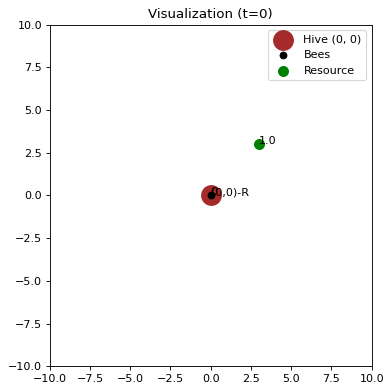

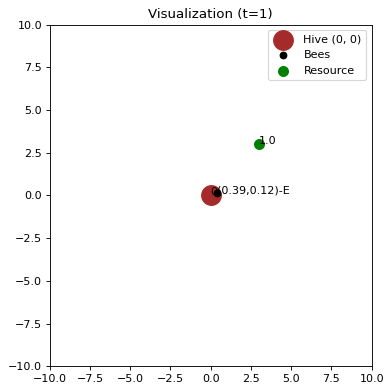

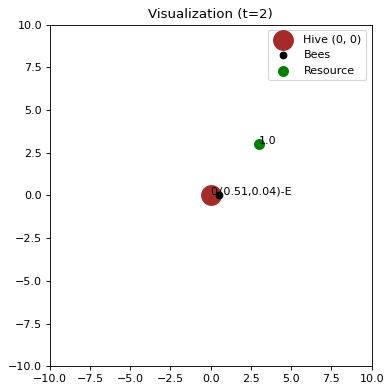

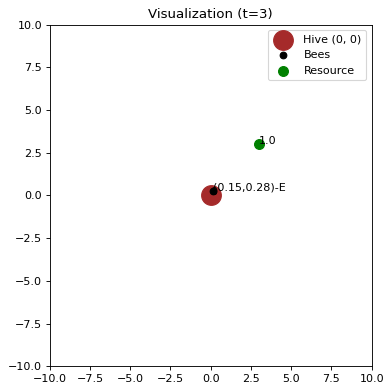

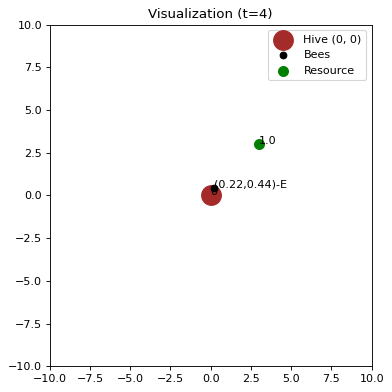

In [190]:
STEPS = 5
for step in range(STEPS):
    visualize(model,dpi=80,figsize=(5,5),step=step)
    model.step()
    
    

In [191]:
for bee in bees:
        # Add text indicating their state (0,1,2,3,4)
        print(bee.location,bee.state)

(0, 0) State.RESTING
(4, -1) State.RESTING
(-2, 6) State.RESTING


## Animation test
- Saves the figures of each time step in an array
- Creates an animation out of them

c:\Users\Pablo\Desktop\ABM\Repo\abm-project\ContinuousModel\Model.py:30: UserWarning: You are trying to set model.agents. In a next release, this attribute is used by MESA itself so you cannot use it directly anymore.Please adjust your code to use a different attribute name for custom agent storage
  self.agents = []


MOVE RANDOM
MOVE RANDOM
MOVE RANDOM
MOVE RANDOM


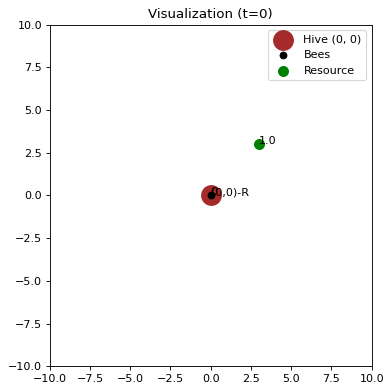

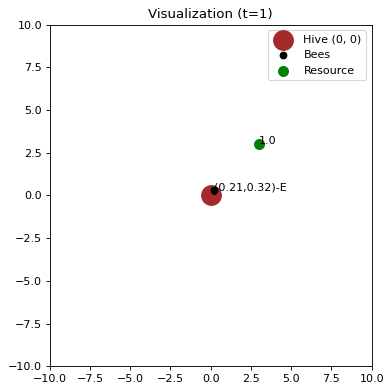

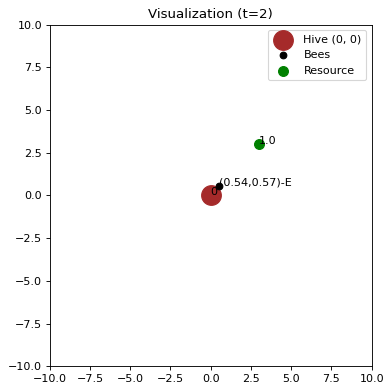

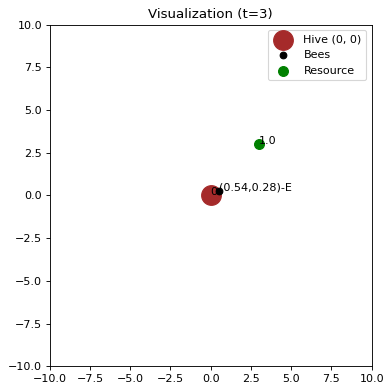

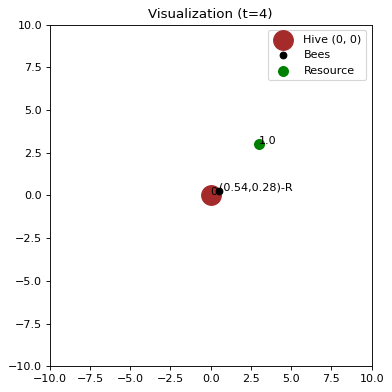

In [210]:
# Create model, a hive, a bee and a single resource
model = Model(SIZE=10)
HIVE = model.create_agent(Hive, location=(0,0))
model.create_agent(Bee, hive=HIVE,location=(0,0))
model.create_agent(Resource, location=(3,3))

STEPS = 5
figures = []
for step in range(STEPS):
    figures.append([visualize(model,dpi=80,figsize=(5,5),step=step)])
    model.step()

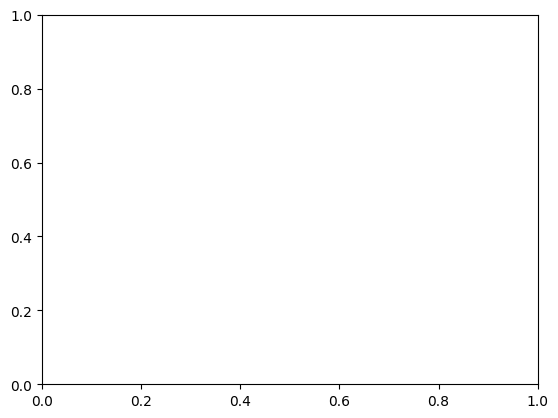

In [221]:
# Based on PLT tutorial at https://matplotlib.org/stable/gallery/animation/dynamic_image.html
# and https://matplotlib.org/stable/gallery/animation/simple_scatter.html
import matplotlib.animation as animation

fig, ax = plt.subplots()


ani = animation.ArtistAnimation(fig, figures, interval=50, blit=True,
                                repeat_delay=1000)

ani.save("movie.mp4")

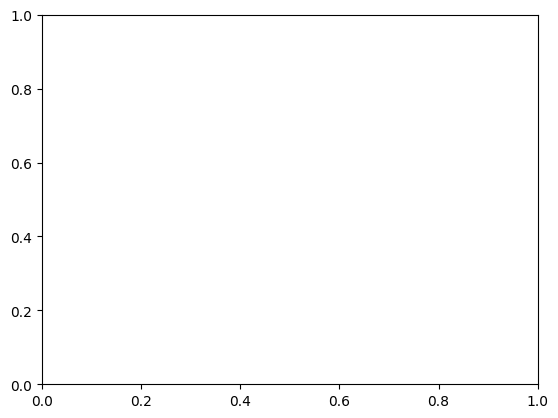

In [222]:

import matplotlib.animation as animation 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

def update(i):
    # This does not work, likely because animation must plot eveyrhing at each step instead of working with the resulting figure with text and legend etc...
    return figures[i]

ani = animation.FuncAnimation(fig, update, frames=len(figures), interval=50, blit=True)
ani.save("animation.mp4")
plt.show()
